# Ejercicio 4.4 (home)


## Enunciado

En la inmobiliaria FeelGood han recopilado datos de precios de las casas que han
vendido últimamente.

Les gustaría poder predecir el precio de una casa a partir de los datos que disponen sobre
características de la casa y del barrio donde está situada. Así pueden dar ya un primer
precio de venta sin tener que llevar un tasador.

Las variables que vamos a usar son:
* ID --> Identificador de la casa
* crim --> Tasa de criminalidad per cápita por ciudad.
* zn --> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
* indus --> Proporción de acres de negocios no minoristas por ciudad.
* chas --> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
* nox --> Concentración de óxidos de nitrógeno (partes por 10 millones).
* rm --> Número medio de habitaciones por vivienda.
* age --> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* dis --> Media ponderada de las distancias a cinco centros de empleo de Boston.
* rad --> Indice de accesibilidad a carreteras radiales.
* tax --> Impuesto sobre el valor total de la propiedad por 10.000 dólares.
* ptratio --> Proporción de alumnos por maestro por ciudad.
* black --> 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad.
* lstat --> Vn estatus más bajo de la población (porcentaje).
* medv --> Valor medio de las casas ocupadas por sus dueños en \ 1000 dólares. Será la variable target a predecir

Tenemos 4 ficheros:
* 2 train
* 2 predict

Primero tendremos que hacer un proceso de ETL ya que los datos de la casa están
separados de los datos del barrio (juntar los dos train entre ellos y los dos test entre ellos)
En predict, no tenemos la variable medv, que es la que tenemos que dar como respuesta

## 1.- Importaciones

Durante el desarrollo de la solución, usaremos esta sección para importar las librerias de python que nos sean necesarias. De esta manera, nos quedara un codigo más limpio y ordenado, a la vez que podemos ver de manera rapida todas aquellas librerias que hemos usado. 

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as msee
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

import itertools

from scipy import stats

import warnings
warnings.filterwarnings('ignore') #una vez el codigo funciona como deberia, para que aparezca más limpio

## 2.- Proceso de ETL

En este caso, el proceso de ETL solo constará de las fases Extract y Transform. 

Primeramente, vamos a realizar la carga de todos los documentos csv a dataframes de manera individual y vamos a analizar su contenido. Posteriormente, vamos a juntar los dataframes de train y de predicción, quedandonos finalmente con solo dos dataframes. 

### Carga de los ficheros de manera individual

In [2]:
PATH_NAME = '../Data/'
FILE_NAME1 = 'train_1.csv'
FILE_NAME2 = 'train_2.csv'
FILE_NAME3 = 'predict_1.csv'
FILE_NAME4 = 'predict_2.csv'

In [3]:
train1 = pd.read_csv(PATH_NAME+FILE_NAME1, sep=",")
train2 = pd.read_csv(PATH_NAME+FILE_NAME2, sep=",")
predict1 = pd.read_csv(PATH_NAME+FILE_NAME3, sep=",")
predict2 = pd.read_csv(PATH_NAME+FILE_NAME4, sep=",")

### Análisis de los datos por fichero

#### Train1

In [4]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv
0      1  18.0     0  6.575  4.0900    1  296  24.0
1      2   0.0     0  6.421  4.9671    2  242  21.6
2      4   0.0     0  6.998  6.0622    3  222  33.4
3      5   0.0     0  7.147  6.0622    3  222  36.2
4      7  12.5     0  6.012  5.5605    5  311  22.9
..   ...   ...   ...    ...     ...  ...  ...   ...
328  500   0.0     0  5.569  2.3999    6  391  17.5
329  502   0.0     0  6.593  2.4786    1  273  22.4
330  503   0.0     0  6.120  2.2875    1  273  20.6
331  504   0.0     0  6.976  2.1675    1  273  23.9
332  506   0.0     0  6.030  2.5050    1  273  11.9

[333 rows x 8 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
medv    float64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
medv    0
dtype: int64 

Indices estadisticos

                ID          zn      

#### Train2

In [5]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train2.duplicated().any())

Vista del DF

       ID     crim  indus    nox   age  ptratio   black  lstat
0      1  0.00632   2.31  0.538  65.2     15.3  396.90   4.98
1      2  0.02731   7.07  0.469  78.9     17.8  396.90   9.14
2      4  0.03237   2.18  0.458  45.8     18.7  394.63   2.94
3      5  0.06905   2.18  0.458  54.2     18.7  396.90   5.33
4      7  0.08829   7.87  0.524  66.6     15.2  395.60  12.43
..   ...      ...    ...    ...   ...      ...     ...    ...
328  500  0.17783   9.69  0.585  73.5     19.2  395.77  15.10
329  502  0.06263  11.93  0.573  69.1     21.0  391.99   9.67
330  503  0.04527  11.93  0.573  76.7     21.0  396.90   9.08
331  504  0.06076  11.93  0.573  91.0     21.0  396.90   5.64
332  506  0.04741  11.93  0.573  80.8     21.0  396.90   7.88

[333 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

 ID       

#### Predict1

In [6]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict1,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict1.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict1.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict1.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict1.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict1.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax
0      3   0.0     0  7.185  4.9671    2  242
1      6   0.0     0  6.430  6.0622    3  222
2      8  12.5     0  6.172  5.9505    5  311
3      9  12.5     0  5.631  6.0821    5  311
4     10  12.5     0  6.004  6.5921    5  311
..   ...   ...   ...    ...     ...  ...  ...
168  496   0.0     0  5.670  2.7986    6  391
169  497   0.0     0  5.390  2.7986    6  391
170  499   0.0     0  6.019  2.4091    6  391
171  501   0.0     0  6.027  2.4982    6  391
172  505   0.0     0  6.794  2.3889    1  273

[173 rows x 7 columns] 

Tipo de datos

 ID        int64
zn      float64
chas      int64
rm      float64
dis     float64
rad       int64
tax       int64
dtype: object 

Existencia de Nulls

 ID      0
zn      0
chas    0
rm      0
dis     0
rad     0
tax     0
dtype: int64 

Indices estadisticos

                ID          zn        chas          rm         dis         rad  \
count  173.000000  173.000000  173.000000  173.00000

#### Predict 2

In [7]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict2,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict2.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict2.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict2.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict2.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict2.duplicated().any())

Vista del DF

       ID     crim  indus    nox    age  ptratio   black  lstat
0      3  0.02729   7.07  0.469   61.1     17.8  392.83   4.03
1      6  0.02985   2.18  0.458   58.7     18.7  394.12   5.21
2      8  0.14455   7.87  0.524   96.1     15.2  396.90  19.15
3      9  0.21124   7.87  0.524  100.0     15.2  386.63  29.93
4     10  0.17004   7.87  0.524   85.9     15.2  386.71  17.10
..   ...      ...    ...    ...    ...      ...     ...    ...
168  496  0.17899   9.69  0.585   28.8     19.2  393.29  17.60
169  497  0.28960   9.69  0.585   72.9     19.2  396.90  21.14
170  499  0.23912   9.69  0.585   65.3     19.2  396.90  12.92
171  501  0.22438   9.69  0.585   79.7     19.2  396.90  14.33
172  505  0.10959  11.93  0.573   89.3     21.0  393.45   6.48

[173 rows x 8 columns] 

Tipo de datos

 ID           int64
crim       float64
indus      float64
nox        float64
age        float64
ptratio    float64
black      float64
lstat      float64
dtype: object 

Existencia de Nulls

### Unificar DataFrames "Train" y "Predict"

#### Train

In [8]:
train = pd.merge(train1,train2,how='inner', on='ID', validate='1:1')
train

,ID,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,1,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,2,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,4,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,5,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,7,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.0,0,5.569,2.3999,6,391,17.5,0.17783,9.69,0.585,73.5,19.2,395.77,15.10
329,502,0.0,0,6.593,2.4786,1,273,22.4,0.06263,11.93,0.573,69.1,21.0,391.99,9.67
330,503,0.0,0,6.120,2.2875,1,273,20.6,0.04527,11.93,0.573,76.7,21.0,396.90,9.08
331,504,0.0,0,6.976,2.1675,1,273,23.9,0.06076,11.93,0.573,91.0,21.0,396.90,5.64


In [9]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",train,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",train.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",train.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",train.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",train.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",train.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax  medv     crim  indus    nox  \
0      1  18.0     0  6.575  4.0900    1  296  24.0  0.00632   2.31  0.538   
1      2   0.0     0  6.421  4.9671    2  242  21.6  0.02731   7.07  0.469   
2      4   0.0     0  6.998  6.0622    3  222  33.4  0.03237   2.18  0.458   
3      5   0.0     0  7.147  6.0622    3  222  36.2  0.06905   2.18  0.458   
4      7  12.5     0  6.012  5.5605    5  311  22.9  0.08829   7.87  0.524   
..   ...   ...   ...    ...     ...  ...  ...   ...      ...    ...    ...   
328  500   0.0     0  5.569  2.3999    6  391  17.5  0.17783   9.69  0.585   
329  502   0.0     0  6.593  2.4786    1  273  22.4  0.06263  11.93  0.573   
330  503   0.0     0  6.120  2.2875    1  273  20.6  0.04527  11.93  0.573   
331  504   0.0     0  6.976  2.1675    1  273  23.9  0.06076  11.93  0.573   
332  506   0.0     0  6.030  2.5050    1  273  11.9  0.04741  11.93  0.573   

      age  ptratio   black  lstat  
0    65.2   

#### Predict

In [60]:
predict = pd.merge(predict1, predict2, how='inner', on='ID', validate='1:1')
predict

,ID,zn,chas,rm,dis,rad,tax,crim,indus,nox,age,ptratio,black,lstat
0,3,0.0,0,7.185,4.9671,2,242,0.02729,7.07,0.469,61.1,17.8,392.83,4.03
1,6,0.0,0,6.430,6.0622,3,222,0.02985,2.18,0.458,58.7,18.7,394.12,5.21
2,8,12.5,0,6.172,5.9505,5,311,0.14455,7.87,0.524,96.1,15.2,396.90,19.15
3,9,12.5,0,5.631,6.0821,5,311,0.21124,7.87,0.524,100.0,15.2,386.63,29.93
4,10,12.5,0,6.004,6.5921,5,311,0.17004,7.87,0.524,85.9,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,496,0.0,0,5.670,2.7986,6,391,0.17899,9.69,0.585,28.8,19.2,393.29,17.60
169,497,0.0,0,5.390,2.7986,6,391,0.28960,9.69,0.585,72.9,19.2,396.90,21.14
170,499,0.0,0,6.019,2.4091,6,391,0.23912,9.69,0.585,65.3,19.2,396.90,12.92
171,501,0.0,0,6.027,2.4982,6,391,0.22438,9.69,0.585,79.7,19.2,396.90,14.33


In [11]:
print("\x1b[1;34m"+"Vista del DF\n")
print("\x1b[;30m",predict,"\n")
print("\x1b[1;34m"+"Tipo de datos\n")
print("\x1b[;30m",predict.dtypes,"\n")
print("\x1b[1;34m"+"Existencia de Nulls\n")
print("\x1b[;30m",predict.isnull().sum(),"\n")
print("\x1b[1;34m"+"Indices estadisticos\n")
print("\x1b[;30m",predict.describe(),"\n")
print("\x1b[1;34m"+"Valores unicos por campo\n")
print("\x1b[;30m",predict.nunique(),"\n")
print("\x1b[1;34m"+"Existencia de duplicados\n")
print("\x1b[;30m",predict.duplicated().any())

Vista del DF

       ID    zn  chas     rm     dis  rad  tax     crim  indus    nox    age  \
0      3   0.0     0  7.185  4.9671    2  242  0.02729   7.07  0.469   61.1   
1      6   0.0     0  6.430  6.0622    3  222  0.02985   2.18  0.458   58.7   
2      8  12.5     0  6.172  5.9505    5  311  0.14455   7.87  0.524   96.1   
3      9  12.5     0  5.631  6.0821    5  311  0.21124   7.87  0.524  100.0   
4     10  12.5     0  6.004  6.5921    5  311  0.17004   7.87  0.524   85.9   
..   ...   ...   ...    ...     ...  ...  ...      ...    ...    ...    ...   
168  496   0.0     0  5.670  2.7986    6  391  0.17899   9.69  0.585   28.8   
169  497   0.0     0  5.390  2.7986    6  391  0.28960   9.69  0.585   72.9   
170  499   0.0     0  6.019  2.4091    6  391  0.23912   9.69  0.585   65.3   
171  501   0.0     0  6.027  2.4982    6  391  0.22438   9.69  0.585   79.7   
172  505   0.0     0  6.794  2.3889    1  273  0.10959  11.93  0.573   89.3   

     ptratio   black  lstat  
0     

# 3.- Selección de variables

Para construir nuestro modelo no vamos a hacer uso de todas las variables disponibles. 

Para realizar la selección vamos a recurrir a los siguientes criterios:
* Criterio propio
* Selección en base a la correlación

## Criterio propio

Eliminamos la columna ID, ya que no nos aporta valor para realizar las predicciones.

In [12]:
train = train.drop(columns=['ID'])
train.head()

,zn,chas,rm,dis,rad,tax,medv,crim,indus,nox,age,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,296,24.0,0.00632,2.31,0.538,65.2,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,242,21.6,0.02731,7.07,0.469,78.9,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,222,33.4,0.03237,2.18,0.458,45.8,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,222,36.2,0.06905,2.18,0.458,54.2,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,311,22.9,0.08829,7.87,0.524,66.6,15.2,395.60,12.43


## Selección en base a la correlación

Construimos la matriz de correlación apra poder ver de manera grafica las relaciones entre las distintas variables.

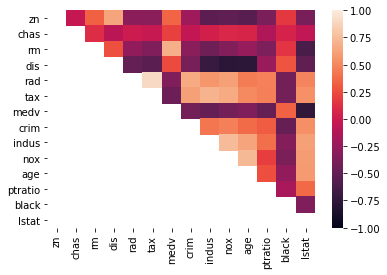

In [13]:
correlation_matrix = train.corr().where(~np.tril(np.ones(train.corr().shape)).astype(np.bool))
correlation_matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,)
plt.show()

A partir de las correlaciones obtenidas, filtramos aquellos pares de variables cuya correlación es mayor a 0.5 o menor a -0.5. Consideramos que los pares cuya correlación sobrepasa dichos niveles los podemos considerar como correlacionados y que ambos valores estan representando una misma caracteristica. Por lo tanto, solo uno de ellos nos seria necesario. 

In [14]:
correlation_table = correlation_matrix.stack().to_frame().reset_index()
correlation_table['corr_columns'] = correlation_table['level_0'] + ' - ' + correlation_table['level_1']
correlation_table = correlation_table.drop(columns=['level_0', 'level_1'])
correlation_table['values'] = correlation_table[0]
correlation_table = correlation_table[['corr_columns', 'values']]
deltacorr = 0.5
filter_1 = correlation_table['values'] > deltacorr
filter_2 = correlation_table['values'] < -deltacorr

correlation_table_1 = correlation_table.where(filter_1 | filter_2).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_1

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
nox - age,0.736000
tax - indus,0.708313
rm - medv,0.689598
tax - nox,0.670722
rad - crim,0.666636
indus - age,0.638378
zn - dis,0.637142


In [15]:
correlation_table_cols = correlation_table_1.index.str.split(expand=True).to_frame().reset_index(drop=True)[[0,2]]

col1 = set(correlation_table_cols[0])
col2 = set(correlation_table_cols[2])
col1 |= col2

correlated_cols = list(col1)
train_cols = list(train.columns)

print(correlated_cols)
print(len(correlated_cols))

print(train_cols)
print(len(train_cols))

['rm', 'lstat', 'dis', 'indus', 'age', 'nox', 'medv', 'tax', 'zn', 'rad', 'crim']
11
['zn', 'chas', 'rm', 'dis', 'rad', 'tax', 'medv', 'crim', 'indus', 'nox', 'age', 'ptratio', 'black', 'lstat']
14


Podemos ver como tenemos un modelo altamente correlacionado, donde 11 de las 14 columnas que tenemos disponibles para realizar las predicciones presentan una correlación superior al 0.5 con almenos una del resto de columnas.
    
Debido a los valores obtenidos augmentaremos nuestro threshold de selección de 0.5 a 0.75.

In [16]:
deltacorr = 0.75
filter_3 = correlation_table['values'] > deltacorr
filter_4 = correlation_table['values'] < -deltacorr

correlation_table_2 = correlation_table.where(filter_3 | filter_4).groupby('corr_columns').sum().sort_values(by='values', ascending=False)
correlation_table_2

,values
corr_columns,
rad - tax,0.903562
indus - nox,0.750087
dis - age,-0.764208
dis - nox,-0.769364


Dadas las siguientes correlaciones decidimos prescindir de las columnas:
* tax, ya que presenta mayor correlación con otras columnas que rad
* age y nox, ya que ambas esta correlacionadas con dis, nox esta correlacionada con indus y ambas presentan un 0.73 de correlación entre ellas (se escapa del threshold definido pero es una correlación notable)

In [17]:
train = train.drop(columns = ["tax", "nox", "age"])
train.head()

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43


## 4.- Eliminación de outliers


### IQR

El primer metodo al que vamos a recurrir para identificar outliers en nuestros datos es iqr.

Las siguientes graficas y métricas nos muestran los potenciales outliers que se identifican el base a la aplicación de este método. 

Variable:  zn


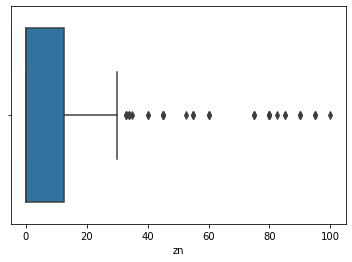

iqr -> 12.5000
upper whisker -> 31.2500
lower whisker -> -18.7500
# outliers -> 41.00
% outliers -> 12.31%
Registros restantes 292




Variable:  chas


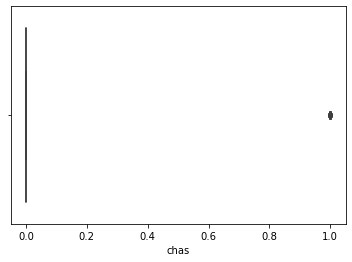

iqr -> 0.0000
upper whisker -> 0.0000
lower whisker -> 0.0000
# outliers -> 292.00
% outliers -> 100.0%
Registros restantes 274




Variable:  rm


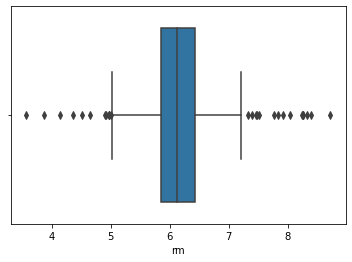

iqr -> 0.5725
upper whisker -> 7.2925
lower whisker -> 5.0025
# outliers -> 27.00
% outliers -> 9.85%
Registros restantes 247




Variable:  dis


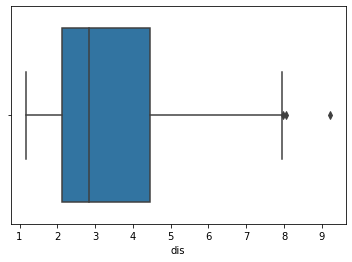

iqr -> 2.3467
upper whisker -> 7.9776
lower whisker -> -1.4090
# outliers -> 3.00
% outliers -> 1.21%
Registros restantes 244




Variable:  rad


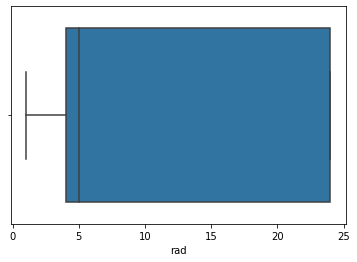

iqr -> 20.0000
upper whisker -> 54.0000
lower whisker -> -26.0000
# outliers -> 0.00
% outliers -> 0.0%
Registros restantes 244




Variable:  crim


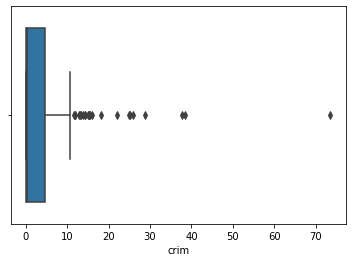

iqr -> 4.4846
upper whisker -> 11.3214
lower whisker -> -6.6170
# outliers -> 23.00
% outliers -> 9.43%
Registros restantes 221




Variable:  indus


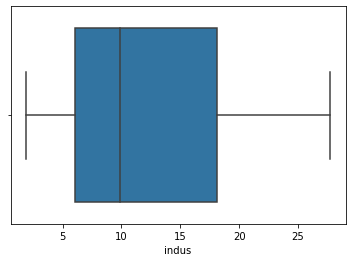

iqr -> 12.0300
upper whisker -> 36.1450
lower whisker -> -11.9750
# outliers -> 0.00
% outliers -> 0.0%
Registros restantes 221




Variable:  ptratio


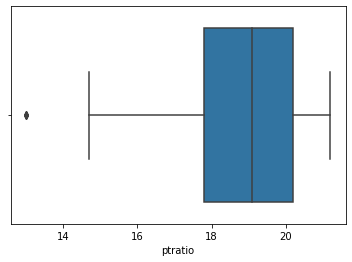

iqr -> 2.4000
upper whisker -> 23.8000
lower whisker -> 14.2000
# outliers -> 4.00
% outliers -> 1.81%
Registros restantes 217




Variable:  black


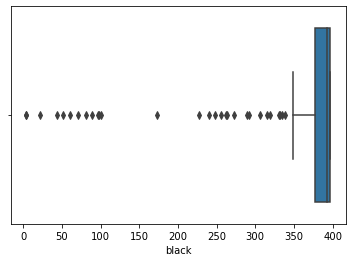

iqr -> 19.8300
upper whisker -> 426.6450
lower whisker -> 347.3250
# outliers -> 29.00
% outliers -> 13.36%
Registros restantes 188




Variable:  lstat


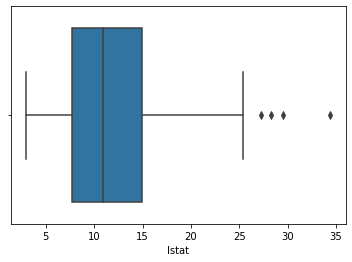

iqr -> 7.2550
upper whisker -> 25.8750
lower whisker -> -3.1450
# outliers -> 4.00
% outliers -> 2.13%
Registros restantes 184






In [18]:
train_iqr = train

for col_name in train_iqr.drop(columns=['medv']):
    print("\x1b[1;34m"+"Variable: ", col_name)
    
    col = train_iqr[col_name]
    sns.boxplot(x=col)
    plt.show()

    q1 = np.quantile(col, 0.25)

    q3 = np.quantile(col, 0.75)
    med = np.median(col)

    iqr = q3-q1

    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    print("iqr -> %.4f" % iqr)
    print("upper whisker -> %.4f" % upper_bound)
    print("lower whisker -> %.4f" % lower_bound)

    outliers = col[(col <= lower_bound) | (col >= upper_bound)]

    print("# outliers -> %.2f" %outliers.count())
    print("% outliers -> " + str(round(outliers.count()/col.count()*100, 2)) + '%')

    train_iqr = train_iqr[(col >= lower_bound) & (col <= upper_bound)]
    print("Registros restantes", train_iqr[col_name].count())
    print("\n\n\n")

In [19]:
print("Numero de registros inicial: ", len(train.index))
print("Numero de registros sin outliers: ", len(train_iqr.index))
print("Porcentage de outliers identificados: %.2f" %(100-(len(train_iqr.index)/len(train.index)*100)), "%")

Numero de registros inicial:  333
Numero de registros sin outliers:  184
Porcentage de outliers identificados: 44.74 %


Dado que este metodo nos identifica como outliers mas del 44% de nuestros registros, podemos concluir que no es un metodo adecuado para nuestro set de datos. Por este motivo vamos a explorar otros metodos de eliminación de outliers que se nos edecuen mejor.

### Z Score o desviación estandar

En este caso, el siguiente metodo que vamos a usar es Z score, que identifica outliers a partir de un threshold definido en base a la desviación estandar. Como threshold vamos a usar 3 desviaciones estandar, un valor estandar para este metodo.

In [20]:
z = np.abs(stats.zscore(train))
z

array([[0.32290583, 0.25278007, 0.44015381, ..., 1.46517068, 0.43298984,
        1.06777158],
       [0.47212294, 0.25278007, 0.22105954, ..., 0.30161579, 0.43298984,
        0.47829937],
       [0.47212294, 0.25278007, 1.04195169, ..., 0.11726397, 0.40673324,
        1.35683968],
       ...,
       [0.47212294, 0.25278007, 0.20717016, ..., 1.18773447, 0.43298984,
        0.48680137],
       [0.47212294, 0.25278007, 1.01065251, ..., 1.18773447, 0.43298984,
        0.97424954],
       [0.47212294, 0.25278007, 0.33521226, ..., 1.18773447, 0.43298984,
        0.65684143]])

In [21]:
thld = 3

train_z = train[(z < thld).all(axis=1)]
train_z.reset_index(drop=True)

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...
263,0.0,0,5.569,2.3999,6,17.5,0.17783,9.69,19.2,395.77,15.10
264,0.0,0,6.593,2.4786,1,22.4,0.06263,11.93,21.0,391.99,9.67
265,0.0,0,6.120,2.2875,1,20.6,0.04527,11.93,21.0,396.90,9.08
266,0.0,0,6.976,2.1675,1,23.9,0.06076,11.93,21.0,396.90,5.64


In [22]:
print("Numero de registros inicial: ", len(train.index))
print("Numero de registros sin outliers: ", len(train_z.index))
print("Porcentage de outliers identificados: %.2f" %(100-(len(train_z.index)/len(train.index)*100)), "%")

Numero de registros inicial:  333
Numero de registros sin outliers:  268
Porcentage de outliers identificados: 19.52 %


Los resultados obtenidos nos parecen más coherentes.

Consideramos que este es el metodo mas adecuado y reasignamos el valor del dataframe de entrenamiento con el nuevo dataframe sin outliers.

In [23]:
train = train_z
train

,zn,chas,rm,dis,rad,medv,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,24.0,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,21.6,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,33.4,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,36.2,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,22.9,0.08829,7.87,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,0,5.569,2.3999,6,17.5,0.17783,9.69,19.2,395.77,15.10
329,0.0,0,6.593,2.4786,1,22.4,0.06263,11.93,21.0,391.99,9.67
330,0.0,0,6.120,2.2875,1,20.6,0.04527,11.93,21.0,396.90,9.08
331,0.0,0,6.976,2.1675,1,23.9,0.06076,11.93,21.0,396.90,5.64


# 5.- Entrenar al modelo supervisado de regresion

Para encontrar el modelo más optimo, que más se ajuste a nuestros datos, vamos a entrenar distintos modelos de regressión lineal.

## Modelo de regresión lineal

### Preparación de los datos

In [24]:
train.columns

Index(['zn', 'chas', 'rm', 'dis', 'rad', 'medv', 'crim', 'indus', 'ptratio',
       'black', 'lstat'],
      dtype='object')

In [25]:
target = train.pop('medv')
target

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 268, dtype: float64

### Regresión lineal simple

"A simple linear regression is a linear regression model with a single explanatory variable"

Vamos a probar que resultados obtenemos al entrenar modelos de regresión lineal usando una sola variable.

Variable = zn
Score train 0.08943227857496272
R2 Score 0.08282680891143313
MSEE 63.36275440703212
MAE 5.190340857909795


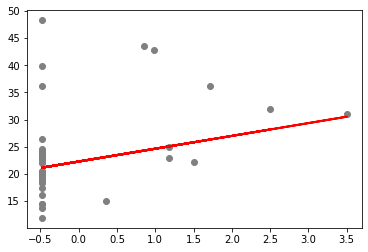





Variable = chas
Score train 0.0
R2 Score -0.04234925846977644
MSEE 72.01052179946977
MAE 5.726668099280111


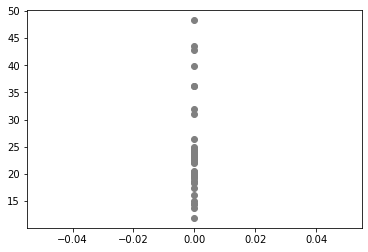





Variable = rm
Score train 0.45784829183653786
R2 Score 0.7027826977510901
MSEE 20.53320693506811
MAE 3.3341788832539097


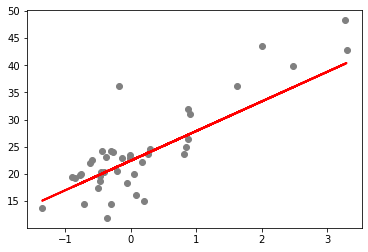





Variable = dis
Score train 0.049493620261383264
R2 Score 0.0011831246397008277
MSEE 69.00309449291619
MAE 5.572399850938535


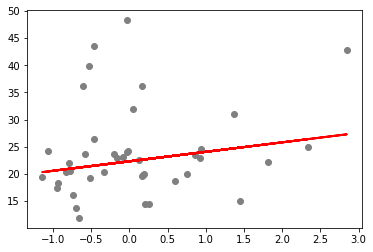





Variable = rad
Score train 0.10890877970198365
R2 Score -0.009512322961970243
MSEE 69.74198767715069
MAE 5.93343949377409


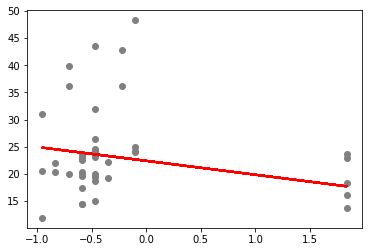





Variable = crim
Score train 0.1873097563340539
R2 Score 0.05585819303765516
MSEE 65.22587666236063
MAE 5.740856138124095


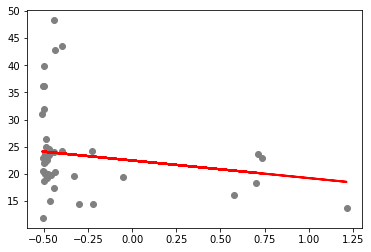





Variable = indus
Score train 0.21303178770457754
R2 Score 0.2006662333666872
MSEE 55.22183774726544
MAE 5.421439473790513


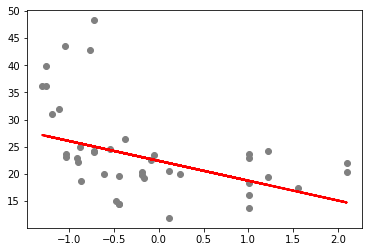





Variable = ptratio
Score train 0.2108897638501377
R2 Score 0.14302760230445688
MSEE 59.203792802034336
MAE 5.278921097635917


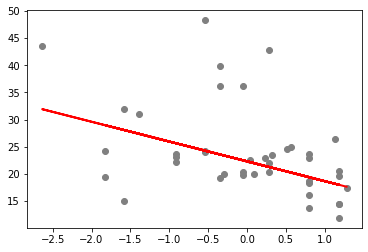





Variable = black
Score train 0.041144294472206244
R2 Score -0.00867993414491175
MSEE 69.68448223684904
MAE 5.655549870266047


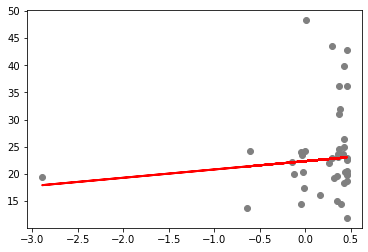





Variable = lstat
Score train 0.5556777717293537
R2 Score 0.46970119547035893
MSEE 36.635603003042505
MAE 3.9518657312561825


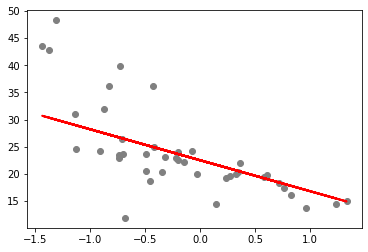

In [26]:
for feature_name in train.columns:
    feature = StandardScaler().fit_transform(train[feature_name].values.reshape((-1, 1)))
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.15, random_state=23)
    
    lr2 = LinearRegression()
    modelo = lr2.fit(X_train, y_train)
    
    print('Variable =',feature_name)    
    print('Score train',lr2.score(X_train, y_train))
    y_pred=lr2.predict(X_test)
    print('R2 Score',r2_score(y_test,y_pred))
    print('MSEE',msee(y_test,y_pred))
    print('MAE',mae(y_test,y_pred))
    
    plt.scatter(X_test, y_test,  color='gray')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.show()
    
    
    print('\n\n\n')
    

Podemos ver como con una sola variable los resultados de aplicar una regressión lineal no son aceptables. Por ese motivo, optamos por probar regressiones lineales multiples con todas las combinaciones posibles de nuestras variables features.

### Regresión lineal multiple

In [27]:
feature_names = train.columns
feature_names

Index(['zn', 'chas', 'rm', 'dis', 'rad', 'crim', 'indus', 'ptratio', 'black',
       'lstat'],
      dtype='object')

In [28]:
multiple_linear_regression_results = pd.DataFrame(columns=['Variables', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
multiple_linear_regression_results.head()

,Variables,Score train,R2 Score,MSEE,MAE


Eligimos un valor de partición pequeño (0.3) debido al reducido numero de muestras que tenemos. Preferimos maximizar el numero de datos que usamos para entrenar los modelos.

In [29]:
for n in range(2, len(feature_names)+1):
    for features_subset in itertools.combinations(feature_names, n):
        features_array = np.asarray(features_subset)
        
        features = StandardScaler().fit_transform(train[features_array])
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
        
        lr2 = LinearRegression()
        modelo = lr2.fit(X_train, y_train)
        
        y_pred = lr2.predict(X_test)
        y_test = y_test.values
        
        res_temp = pd.DataFrame([
            ['-'.join(features_array), 
             lr2.score(X_train, y_train),
             r2_score(y_test,y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
        ], columns=['Variables', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
        multiple_linear_regression_results = multiple_linear_regression_results.append(res_temp)

multiple_linear_regression_results = multiple_linear_regression_results.reset_index(drop=True)

In [30]:
#Top 10 combinaciones con mejor score de train
multiple_linear_regression_results.sort_values(by='Score train', ascending=False).head(10)

,Variables,Score train,R2 Score,MSEE,MAE
1012,zn-chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.674660,0.722801,16.389626,2.894363
1010,zn-rm-dis-rad-crim-indus-ptratio-black-lstat,0.674660,0.722801,16.389626,2.894363
986,zn-rm-dis-rad-crim-indus-ptratio-lstat,0.674660,0.722909,16.383220,2.893702
1003,zn-chas-rm-dis-rad-crim-indus-ptratio-lstat,0.674660,0.722909,16.383220,2.893702
1005,zn-chas-rm-dis-rad-crim-ptratio-black-lstat,0.673255,0.720442,16.529063,2.883371
988,zn-rm-dis-rad-crim-ptratio-black-lstat,0.673255,0.720442,16.529063,2.883371
897,zn-rm-dis-rad-crim-ptratio-lstat,0.673230,0.719324,16.595218,2.887850
961,zn-chas-rm-dis-rad-crim-ptratio-lstat,0.673230,0.719324,16.595218,2.887850
1001,rm-dis-rad-crim-indus-ptratio-black-lstat,0.672909,0.722444,16.410691,2.946410
1011,chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.672909,0.722444,16.410691,2.946410


In [31]:
#Top 10 combinaciones con mejor score de test
multiple_linear_regression_results.sort_values(by='R2 Score', ascending=False).head(10)

,Variables,Score train,R2 Score,MSEE,MAE
268,chas-rm-ptratio-lstat,0.642713,0.738698,15.449711,2.771409
128,rm-ptratio-lstat,0.642713,0.738698,15.449711,2.771409
727,zn-rm-crim-indus-ptratio-black,0.529332,0.737689,15.509361,2.838097
867,zn-chas-rm-crim-indus-ptratio-black,0.529332,0.737689,15.509361,2.838097
601,rm-crim-indus-ptratio-black,0.529281,0.737676,15.510140,2.832244
783,chas-rm-crim-indus-ptratio-black,0.529281,0.737676,15.510140,2.832244
334,rm-crim-ptratio-lstat,0.643752,0.735675,15.628437,2.796447
530,chas-rm-crim-ptratio-lstat,0.643752,0.735675,15.628437,2.796447
212,zn-rm-ptratio-lstat,0.644491,0.735448,15.641866,2.823605
394,zn-chas-rm-ptratio-lstat,0.644491,0.735448,15.641866,2.823605


In [32]:
multiple_linear_regression_results['Media scores'] = (multiple_linear_regression_results['Score train'] + multiple_linear_regression_results['R2 Score'])/2
multiple_linear_regression_results.sort_values(by='Media scores', ascending=False).head(10)

,Variables,Score train,R2 Score,MSEE,MAE,Media scores
986,zn-rm-dis-rad-crim-indus-ptratio-lstat,0.674660,0.722909,16.383220,2.893702,0.698784
1003,zn-chas-rm-dis-rad-crim-indus-ptratio-lstat,0.674660,0.722909,16.383220,2.893702,0.698784
1012,zn-chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.674660,0.722801,16.389626,2.894363,0.698730
1010,zn-rm-dis-rad-crim-indus-ptratio-black-lstat,0.674660,0.722801,16.389626,2.894363,0.698730
1011,chas-rm-dis-rad-crim-indus-ptratio-black-lstat,0.672909,0.722444,16.410691,2.946410,0.697677
1001,rm-dis-rad-crim-indus-ptratio-black-lstat,0.672909,0.722444,16.410691,2.946410,0.697677
994,chas-rm-dis-rad-crim-indus-ptratio-lstat,0.672908,0.722296,16.419472,2.947294,0.697602
950,rm-dis-rad-crim-indus-ptratio-lstat,0.672908,0.722296,16.419472,2.947294,0.697602
1005,zn-chas-rm-dis-rad-crim-ptratio-black-lstat,0.673255,0.720442,16.529063,2.883371,0.696849
988,zn-rm-dis-rad-crim-ptratio-black-lstat,0.673255,0.720442,16.529063,2.883371,0.696849


Al definir que para el modelo de regresión lineal con combinación de variables, el mejor resultado lo entrega la combinación de INDEX "986", grafiquemos las predicciones para esa condición observada versus los datos de test.

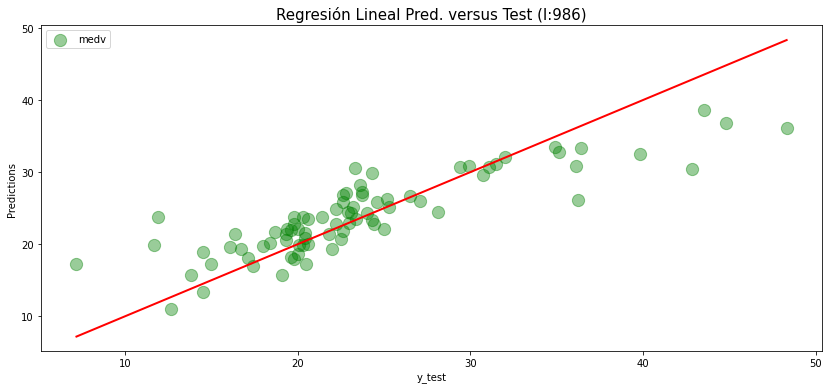

In [33]:
features3 = StandardScaler().fit_transform(train[multiple_linear_regression_results['Variables'][986].split("-")])
X_train, X_test, y_train, y_test = train_test_split(features3, target, test_size=0.3, random_state=23)
        
lr2 = LinearRegression()
modelo = lr2.fit(X_train, y_train)
        
y_pred = lr2.predict(X_test)
y_test = y_test.values

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Regresión Lineal Pred. versus Test (I:986)', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

Nos quedamos con la combinación con indice 986. Nos proporciona los mejores de predicción con los datos de testing y, también, es la combinación más equilibrada entre los resultados de entrenamiento y testeo.

Seguidamente, le aplicamos cross validation para ver si conseguimos mejorar los resultados obtenidos hasta el momento.

### Modelo de regresión lineal con Cross Validation

In [34]:
optimal_feature_names = multiple_linear_regression_results.loc[1012]['Variables'].split("-")
optimal_feature_names

['zn',
 'chas',
 'rm',
 'dis',
 'rad',
 'crim',
 'indus',
 'ptratio',
 'black',
 'lstat']

In [35]:
optimal_features = StandardScaler().fit_transform(train[optimal_feature_names])

X_train, X_test, y_train, y_test = train_test_split(optimal_features, target, test_size=0.3)

clr = LinearRegression()

kf = KFold(n_splits=5)

modelo = clr.fit(X_train, y_train)

print('Score train',modelo.score(X_train, y_train))

scores = cross_val_score(modelo, X_train, y_train, cv=kf)

print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())


predicciones=clr.predict(X_test)

print('Score train', clr.score(X_train, y_train))
print('R2 Score',r2_score(y_test,predicciones))
print('MSEE',msee(y_test,predicciones))
print('MAE',mae(y_test,predicciones))

Score train 0.6915303096977565
Metricas cross_validation [0.55319028 0.68889777 0.80660434 0.64818491 0.28706655]
Media de cross_validation 0.5967887721167434
Score train 0.6915303096977565
R2 Score 0.6800280548680732
MSEE 16.030770994081852
MAE 2.9373641077220034


Los resultados con cross validation no nos mejoran. Optamos por probar otro tipo de algoritmos de regresión en busca de mejores resultados.

## Regression polinomial

In [36]:
polinomial_regression_results = pd.DataFrame(columns=['Variables', 'Degree', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
polinomial_regression_results.head()

,Variables,Degree,Score train,R2 Score,MSEE,MAE


In [37]:
for n in range(2, len(feature_names)+1):
    for features_subset in itertools.combinations(feature_names, n):
        features_array = np.asarray(features_subset)
        
        features = StandardScaler().fit_transform(train[features_array])
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
        
        X_poly_train = PolynomialFeatures(degree=int(n)).fit_transform(X_train)
        X_poly_test = PolynomialFeatures(degree=int(n)).fit_transform(X_test)

        lin_reg = LinearRegression()
        modelo = lin_reg.fit(X_poly_train, y_train)
        
        y_pred = modelo.predict(X_poly_test)
        y_test = y_test.values
        
        res_temp = pd.DataFrame([
            [' - '.join(features_array), 
             n,
             modelo.score(X_poly_train, y_train),
             r2_score(y_test,y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
        ], columns=['Variables', 'Degree', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
        polinomial_regression_results = polinomial_regression_results.append(res_temp) 

In [38]:
# Top 10 combinaciones con mejor score de train
polinomial_regression_results.sort_values(by='Score train', ascending=False).head(10)

,Variables,Degree,Score train,R2 Score,MSEE,MAE
0,zn - chas - rm - dis - rad - crim - indus - pt...,10,1.0,-1.440484e+07,8.516978e+08,3684.898990
0,chas - rm - dis - rad - crim - indus,6,1.0,-4.113590e+05,2.432198e+07,612.069340
0,zn - dis - rad - ptratio - black - lstat,6,1.0,-8.883661e+07,5.252535e+09,9175.306856
0,zn - dis - crim - indus - ptratio - black,6,1.0,-5.045484e+08,2.983182e+10,19356.076135
0,zn - dis - crim - indus - ptratio - lstat,6,1.0,-1.625559e+03,9.617162e+04,103.129310
0,zn - dis - crim - indus - black - lstat,6,1.0,-5.919234e+06,3.499794e+08,2123.380056
0,zn - dis - crim - ptratio - black - lstat,6,1.0,-1.255184e+05,7.421436e+06,359.519536
0,zn - dis - indus - ptratio - black - lstat,6,1.0,-1.249030e+08,7.384991e+09,11010.562512
0,zn - rad - crim - indus - black - lstat,6,1.0,-5.144606e+07,3.041789e+09,6323.453567
0,zn - rad - crim - ptratio - black - lstat,6,1.0,-1.163011e+07,6.876395e+08,3004.684858


In [39]:
# Top 10 combinaciones con mejor score de test
polinomial_regression_results.sort_values(by='R2 Score', ascending=False).head(10)

,Variables,Degree,Score train,R2 Score,MSEE,MAE
0,chas - rm - lstat,3,0.771266,0.801956,11.709486,2.454005
0,rm - crim - ptratio,3,0.662943,0.792941,12.242525,2.672725
0,rm - lstat,2,0.721882,0.789991,12.416926,2.557894
0,rm - crim - lstat,3,0.826396,0.787659,12.554808,2.548302
0,rm - rad - lstat,3,0.829107,0.782039,12.887091,2.757043
0,rm - ptratio - lstat,3,0.810034,0.781590,12.913684,2.503276
0,rm - ptratio,2,0.561306,0.779269,13.050882,2.567123
0,rm - indus - lstat,3,0.810534,0.776639,13.206410,2.610583
0,rm - dis - ptratio,3,0.593676,0.774384,13.339723,2.726769
0,chas - rm - indus - ptratio,4,0.637743,0.768436,13.691406,2.735565


In [40]:
polinomial_regression_results['Media scores'] = (polinomial_regression_results['Score train'] + polinomial_regression_results['R2 Score'])/2
polinomial_regression_results.sort_values(by='Media scores', ascending=False).head(10)

,Variables,Degree,Score train,R2 Score,MSEE,MAE,Media scores
0,rm - rad - crim - lstat,4,0.941350,0.689917,18.333919,2.876131,0.815633
0,rm - crim - lstat,3,0.826396,0.787659,12.554808,2.548302,0.807027
0,rm - rad - lstat,3,0.829107,0.782039,12.887091,2.757043,0.805573
0,chas - rm - rad - lstat,4,0.868465,0.738373,15.468892,2.785508,0.803419
0,rm - dis - crim - lstat,4,0.895334,0.699971,17.739453,2.920205,0.797652
0,chas - rm - crim - lstat,4,0.853721,0.741358,15.292409,2.539868,0.797540
0,chas - rm - black - lstat,4,0.832867,0.761728,14.088039,2.588934,0.797297
0,rm - ptratio - lstat,3,0.810034,0.781590,12.913684,2.503276,0.795812
0,rm - indus - lstat,3,0.810534,0.776639,13.206410,2.610583,0.793586
0,chas - rm - lstat,3,0.771266,0.801956,11.709486,2.454005,0.786611


En Regresión Polinomial, se observa una mejora en los resultados del modelo en comparación con Regregión Lineal. Se observa que los modelos con mejores "Score train" tienen a la vez los peores "R2 Score", ya al ordenar por la media del "Score test" y el "R2 Score", se observan los mejores modelos. La combinación de variables "rm - rad - lstat", entrega mejores resultados por lo que se graficara su predicciones frente a los valores de test.

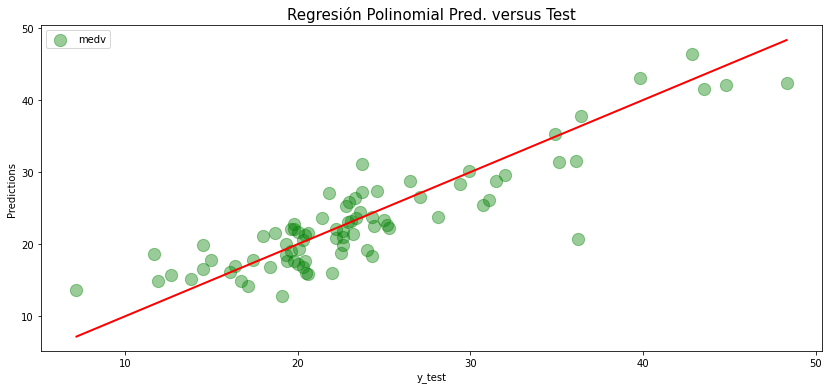

In [41]:
features4 = StandardScaler().fit_transform(train[['rm','rad','lstat']])
X_train, X_test, y_train, y_test = train_test_split(features4, target, test_size=0.3, random_state=23)
        
        
X_poly_train = PolynomialFeatures(degree=int(3)).fit_transform(X_train)
X_poly_test = PolynomialFeatures(degree=int(3)).fit_transform(X_test)

lin_reg1 = LinearRegression()
modelo = lin_reg1.fit(X_poly_train, y_train)
        
y_pred = modelo.predict(X_poly_test)
y_test = y_test.values

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Regresión Polinomial Pred. versus Test', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

## Random Forest

In [42]:
random_forest_results = pd.DataFrame(columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for a in range(100,1100,100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
    rf3 = RandomForestRegressor(n_estimators = int(a), random_state = 23)
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(a),
             rf3.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    random_forest_results = random_forest_results.append(res_temp)

random_forest_results = random_forest_results.reset_index(drop=True)

In [43]:
# Combinaciones de resultados de Random Forest
random_forest_results.sort_values(by='R2 Score', ascending=False)

,"Valor de ""n""",Score train,R2 Score,MSEE,MAE
1,200,0.968944,0.790595,12.381220,2.488901
0,100,0.968496,0.786759,12.608059,2.526383
2,300,0.970126,0.784779,12.725135,2.505342
6,700,0.970633,0.781077,12.943999,2.524088
4,500,0.970236,0.780856,12.957086,2.525548
5,600,0.970450,0.780594,12.972550,2.526191
3,400,0.970773,0.779202,13.054869,2.524614
7,800,0.971122,0.778200,13.114113,2.532099
9,1000,0.970924,0.778116,13.119076,2.534037
8,900,0.970952,0.777422,13.160129,2.537005


Para el modelo por Random Forest, mejora bastante los modelos, entregando los mejores "Score train" hasta ahora, ademas de dar un buen "R2 Score" lo que muestra buenos resultados para poder utilizarlos este modelo como predictivo final. Se grafica el Random Forest con n igual a 200 ya que tiene el mejor "R2 Score".

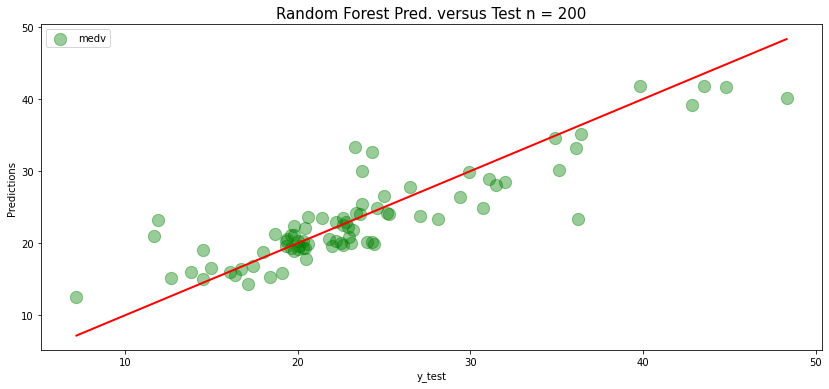

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
rf4 = RandomForestRegressor(n_estimators = 200, random_state = 42)
rf4.fit(X_train, y_train)
y_pred = rf4.predict(X_test)

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Random Forest Pred. versus Test n = 200', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

## AdaBoost

Anteriormente hemos visto la implementación del Random Forest, algortimo que nos ha dado los mejores resultados hasta el momento. Random Forest se basa en el mètodo de bagging, considerado como un metodo de ensamblage. 

En este caso vamos a probar de nuevo otro metodo de ensemblage, el Boosting. El algoritmo base utilizado para el boosting se basara tambien en arboles.

El approach tomado es el siguiente. Para poder encontrar la mejor implementación posible, dado que no tenemos la experiencia suficiente para aproximarnos a la solución más optima de primeras, hemos decidido realizar un bucle (muy costoso) que itera todas las combinaciones posibles de learning rates,  numero de arboles y opciones de loss y genera un modelo basado en Boosting para cada combinación.

Almacenamos todos los resultados obtenido en un dataframe y finalmente vemos que configuración es la que nos ofrece mejores resultados.

In [45]:
train.head()

,zn,chas,rm,dis,rad,crim,indus,ptratio,black,lstat
0,18.0,0,6.575,4.0900,1,0.00632,2.31,15.3,396.90,4.98
1,0.0,0,6.421,4.9671,2,0.02731,7.07,17.8,396.90,9.14
2,0.0,0,6.998,6.0622,3,0.03237,2.18,18.7,394.63,2.94
3,0.0,0,7.147,6.0622,3,0.06905,2.18,18.7,396.90,5.33
4,12.5,0,6.012,5.5605,5,0.08829,7.87,15.2,395.60,12.43


In [46]:
ada_boost_results = pd.DataFrame(columns=['n_tree', 'learning_rate', 'loss', 'R2 Score'])
ada_boost_results.head()

,n_tree,learning_rate,loss,R2 Score


In [47]:
from sklearn.ensemble import AdaBoostRegressor
from matplotlib import pyplot

def get_dataset():
    features = StandardScaler().fit_transform(train)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
    return X_train, X_test, y_train, y_test
 
def get_models():
    models = dict()
    n_trees = [10, 50, 100, 500, 1000, 5000]
    learning_rates = list(np.around(np.arange(0.1, 2.1, 0.1), 1))
    loss_opts = ["linear", "square", "exponential"]
    
    for hyperparameters in list(itertools.product(n_trees, learning_rates, loss_opts)):
        n_tree = hyperparameters[0]
        learning_rate = hyperparameters[1]
        loss = hyperparameters[2]
        
        models[str(n_tree)+"-"+str(learning_rate)+"-"+str(loss)] = \
            AdaBoostRegressor(n_estimators=n_tree, learning_rate=learning_rate, loss=loss, random_state=23)
    
    return models
 


X_train, X_test, y_train, y_test = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    name_split = name.split("-")
    
    res_temp = pd.DataFrame([[
            name_split[0], 
            name_split[1],
            name_split[2],
            r2_score(y_test, y_pred)
        ]], columns = ['n_tree', 'learning_rate', 'loss', 'R2 Score'])
        
    ada_boost_results = ada_boost_results.append(res_temp).reset_index(drop=True)

In [48]:
ada_boost_results.sort_values(by='R2 Score', ascending=False)

,n_tree,learning_rate,loss,R2 Score
57,10,2.0,linear,0.824577
117,50,2.0,linear,0.812080
23,10,0.8,exponential,0.811960
99,50,1.4,linear,0.808202
53,10,1.8,exponential,0.807512
...,...,...,...,...
292,1000,1.8,square,-3.877412
352,5000,1.8,square,-4.249699
235,500,1.9,square,-7.838407
355,5000,1.9,square,-9.569330


## Neural Net

### Variando numero de iteraciones y con una sola capa de 100 neuronas

In [49]:
net_results = pd.DataFrame(columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for i in range(500,1200,100):
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=23, test_size=0.3)
    net = MLPRegressor(random_state=23, max_iter=i).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(i),
             net.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    net_results = net_results.append(res_temp)

net_results.reset_index(drop=True)

,Cantidad de iteraciones,Score train,R2 Score,MSEE,MAE
0,500,0.639911,0.735373,15.646273,3.078767
1,600,0.691053,0.754179,14.534375,2.966909
2,700,0.726803,0.761441,14.104987,2.893758
3,800,0.753268,0.765924,13.839957,2.820903
4,900,0.774821,0.768625,13.680239,2.734520
5,1000,0.791819,0.768825,13.668405,2.701432
6,1100,0.804863,0.767388,13.753374,2.697477


### 100 neuronas totales, 900 iteraciones y variando el numero de capas

In [50]:
distribuciones = [(60,40,), (50,30,20,), (40,30,20,10,)]

for n in range(1,4):
    hidden_layer_sizes = distribuciones[n-1]
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=23, test_size=0.3)
    net = MLPRegressor(random_state=23, max_iter=900, hidden_layer_sizes=hidden_layer_sizes).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    print('Numero de Hiden layers = ', len(hidden_layer_sizes))
    print('Score del entrenamiento',net.score(X_train,y_train))
    print('R2 Score',r2_score(y_pred,y_test))
    print('\n\n')

Numero de Hiden layers =  2
Score del entrenamiento 0.8915688494479491
R2 Score 0.7194520347685465



Numero de Hiden layers =  3
Score del entrenamiento 0.890296624967171
R2 Score 0.7214197714492212



Numero de Hiden layers =  4
Score del entrenamiento 0.9158694288609903
R2 Score 0.7293185872641876





Al realizar la "Neural Net", se prueban distintas configuraciones de red. Primero se realiza una red con solo una Hiden Layer y 100 neuronas, en esta se prueba para distinto numero de iteraciones en donde se observa que sobre 900 iteraciones, el modelo ya no se ajusta mas llegando al valor de "Convergencia", esto ya que el valor de "R2 Score" no sigue aumentando y el "Train test" aumenta pudiendo ser una señal de "Over fitting". Al ir probando con mas Hiden layers y manteniendo la cantidad de neuronas (con 900 iteraciones), se observan mejores resultados para "Score train" con 3 capas pero no asi para el "R2 Score". Se grafica el mejor modelo de "Neural Net" con una capa de 100 neuronas y 900 iteraciones.

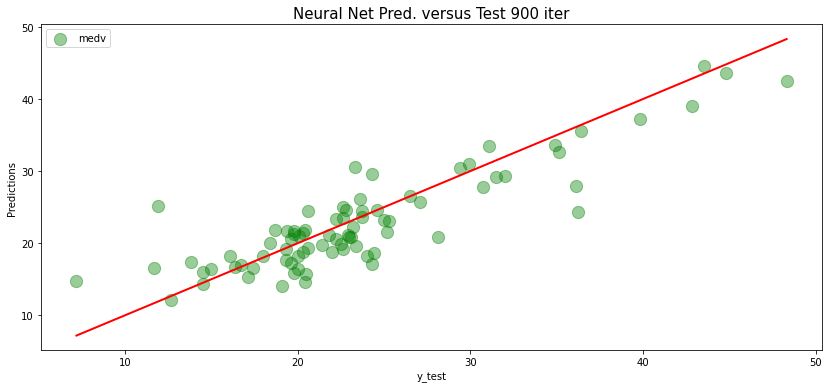

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=23)
net = MLPRegressor(random_state=23, max_iter=900).fit(X_train, y_train)
y_pred = net.predict(X_test)

plt.figure(figsize=(14,6))
plt.scatter(y_test,y_pred,alpha=0.4, c='g', s=150, label = 'medv')
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.legend(loc='upper left')
plt.title('Neural Net Pred. versus Test 900 iter', fontsize=15)

p1=min(y_test)
p2=max(y_test)
plt.plot([p1,p2],[p1,p2],'r',linewidth=2)

## Modelos sin variable "black"

### Random Forest 
##### Particion de datos de train y variando n

In [52]:
train1 = train.drop(columns = 'black')
features_sin_black = StandardScaler().fit_transform(train1)
random_forest_results1 = pd.DataFrame(columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for a in range(100,1000,100):
    X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, test_size=0.3, random_state = 23)
    rf3 = RandomForestRegressor(n_estimators = int(a), random_state = 23)
    rf3.fit(X_train, y_train)
    y_pred = rf3.predict(X_test)
    res_temp = pd.DataFrame([[ 
             str(a),
             rf3.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Valor de "n"', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    random_forest_results1 = random_forest_results1.append(res_temp)

In [53]:
# Combinaciones de resultados de Random Forest
random_forest_results1.sort_values(by='R2 Score', ascending=False)

,"Valor de ""n""",Score train,R2 Score,MSEE,MAE
0,200,0.967242,0.797451,11.975856,2.462290
0,100,0.966846,0.794873,12.128268,2.500716
0,300,0.969292,0.791698,12.316010,2.478807
0,600,0.970316,0.786779,12.606858,2.508414
0,500,0.969994,0.786565,12.619516,2.511437
0,700,0.970562,0.786373,12.630841,2.505335
0,400,0.970212,0.785044,12.709451,2.508352
0,800,0.971330,0.782580,12.855147,2.519605
0,900,0.971218,0.781559,12.915499,2.528343


### Neural Net
##### Variando numero de iteraciones, solo una capa con 100 neuronas

In [54]:
net_results = pd.DataFrame(columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
for i in range(500,1200,100):
    X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, random_state=23, test_size=0.3)
    net = MLPRegressor(random_state=23, max_iter=i).fit(X_train, y_train)
    y_pred = net.predict(X_test)
    
    res_temp = pd.DataFrame([[ 
             str(i),
             net.score(X_train, y_train),
             r2_score(y_test, y_pred), 
             msee(y_test,y_pred), 
             mae(y_test,y_pred)]
    ], columns=['Cantidad de iteraciones', 'Score train', 'R2 Score', 'MSEE', 'MAE'])
        
    net_results = net_results.append(res_temp)

net_results.reset_index(drop=True)

,Cantidad de iteraciones,Score train,R2 Score,MSEE,MAE
0,500,0.652248,0.758231,14.294779,2.948171
1,600,0.705115,0.765739,13.850844,2.837543
2,700,0.742183,0.767212,13.763771,2.771057
3,800,0.769247,0.768045,13.714499,2.726722
4,900,0.789267,0.768579,13.682975,2.717901
5,1000,0.803992,0.768196,13.705624,2.720438
6,1100,0.815239,0.767479,13.747982,2.712057


# Resultados

# Modelo de Random Forest con n = 900  

In [61]:
# Entrenando el modelo seleccionado
X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, test_size=0.3, random_state=23)
RandomForest_Modelo = RandomForestRegressor(n_estimators = 900, random_state = 23)
RandomForest_Modelo.fit(X_train, y_train)

# Preparando los datos de entrada nuevos
ID_predict = predict["ID"]
predict = predict.drop(columns = ["ID","tax", "nox", "age","black"])

medv_predichos = RandomForest_Modelo.predict(predict)
medv_predichos

array([22.67855556, 22.81466667, 22.68033333, 22.68877778, 22.68033333,
       22.54711111, 22.55955556, 22.54711111, 22.54711111, 22.59      ,
       22.54711111, 22.554     , 22.15322222, 22.46522222, 22.68566667,
       22.68566667, 22.68566667, 22.68011111, 22.68855556, 22.68588889,
       22.68588889, 22.68588889, 22.68033333, 22.68011111, 22.68566667,
       22.68566667, 22.68588889, 22.68566667, 22.68588889, 22.68566667,
       22.68566667, 22.68566667, 22.68566667, 22.68011111, 22.68011111,
       22.68566667, 22.68011111, 22.68855556, 22.68011111, 22.68011111,
       22.53377778, 22.699     , 22.68111111, 22.67944444, 22.68655556,
       19.52644444, 21.79988889, 21.66411111, 22.12488889, 22.55811111,
       19.87466667, 22.39166667, 21.81377778, 21.72944444, 22.68566667,
       22.68566667, 22.68033333, 22.67033333, 22.849     , 22.849     ,
       22.84144444, 22.81488889, 22.68855556, 22.694     , 22.68011111,
       22.68855556, 22.68855556, 22.68566667, 22.68566667, 22.68

Text(0.5, 1.0, 'Resultados del modelo con nuevos datos')

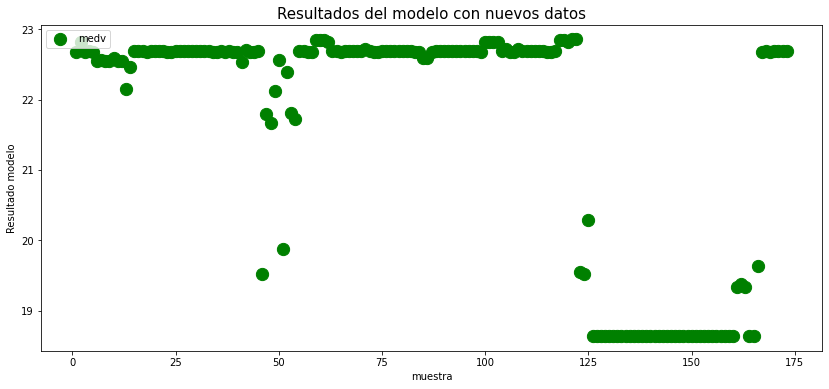

In [56]:
sample = []
for i in range(len(medv_predichos)):
    sample.append(i+1)

plt.figure(figsize=(14,6))
plt.scatter(sample,medv_predichos, c='g', s=150, label = 'medv')
plt.xlabel('muestra')
plt.ylabel('Resultado modelo')
plt.legend(loc='upper left')
plt.title('Resultados del modelo con nuevos datos', fontsize=15)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(features_sin_black, target, random_state=23)
net_comparar = MLPRegressor(random_state=23, max_iter=900).fit(X_train, y_train)
medv_predichos_comparar = net_comparar.predict(predict)
r2_score(medv_predichos,medv_predichos_comparar)

-866.5658869223432

Text(0.5, 1.0, 'Resultados del modelo con nuevos datos')

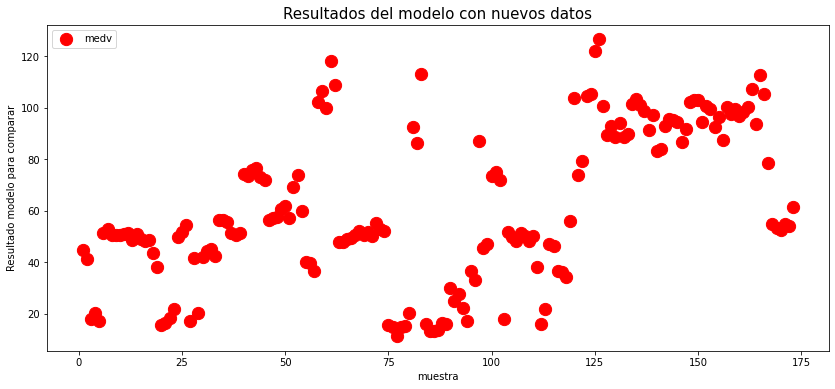

In [58]:
plt.figure(figsize=(14,6))
plt.scatter(sample,medv_predichos_comparar, c='r', s=150, label = 'medv')
plt.xlabel('muestra')
plt.ylabel('Resultado modelo para comparar')
plt.legend(loc='upper left')
plt.title('Resultados del modelo con nuevos datos', fontsize=15)

Text(0.5, 1.0, 'Resultados del modelo con nuevos datos')

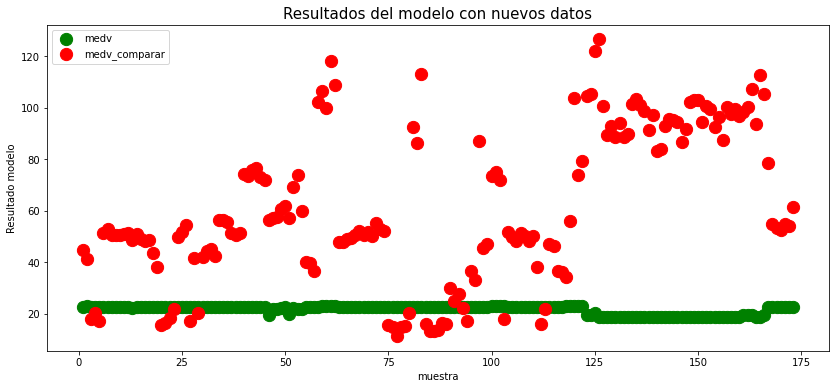

In [59]:
plt.figure(figsize=(14,6))
plt.scatter(sample,medv_predichos, c='g', s=150, label = 'medv')
plt.scatter(sample,medv_predichos_comparar, c='r', s=150, label = 'medv_comparar')
plt.xlabel('muestra')
plt.ylabel('Resultado modelo')
plt.legend(loc='upper left')
plt.title('Resultados del modelo con nuevos datos', fontsize=15)

### Exportación de las resultados predichos

In [93]:
OUTPUT = "resultado_pred.csv"
data = {'ID': list(ID_predict), 'medv_predichos': list(medv_predichos.round(3))}
df_resultados_pred = pd.DataFrame(data)
df_resultados_pred.to_csv(PATH_NAME+OUTPUT, sep=",", index = False)

# Conclusiones

1) Dentro de los modelos de regresión de Machine Learning Supervisado realizados, el que tiene los mejores resultados frente a los datos de entrenamiento como a los datos de test, es el modelo de "Random Forest". Esto principalmente por el valor de R2 obtenido frente a las predicciones del modelo, los cuales servira para poder dar prediccion a las muestras del dataset que no tienen valor objetivo del "medv".

2) El modelo de "Regresion Lineal", no supero valores de "Score" sobre el 0.7 ni tampoco de "R2 Score" sobre este valor, lo que no entrego resultados deseados.

3) El modelo de "Regresion Polinomial" mejoro los valores de coste sobre los datos de entrenamiento del modelo frente al de Regresion lineal, pero no obtenia buenos resultados de "R2 Score" con los datos de test, por lo que aun no se podia considerar un modelo optimo.

3) El modelo de "Random Forest" mejoro considerablemente los resultados, obteniendo valores sobre el 0.85 tanto en el "Score train" como en el "R2 Score", lo que demuestra que es un buen modelo para poder utilizar con datos nuevos.

4) La "Neuronal Net", tambien tuvo buenos resultados en el "Score train" y el "R2 Score", pero no supero la bondad del modelo de "Random Forest", por lo que si bien es un buen modelo para este data set, finalmente el que mas se adecua a los datos de entrenamiento fue el modelo anterior. Se pudo observar que al aumentar la cantidad de "Hiden Layers" en el modelo, este no mejoraba pero si mejoro su "Score train" al tener 2 "Hiden layers", luego al seguir aumentando capas este modelo empeoro en comparación al tener solo una capa.

5) Se realiza los dos mejores modelos observados ("Random Forest" y "Neuronal Net") con el data set sin la variable "black", esto considerando que es una variable que se podria considerar delicada frente a posibles temas de discriminación racial. Aun asi al eliminarla, los modelos mejoran sus resultados, por lo que podria ser prudente mencionarle al cliente esta opción considerando lo delicado de la información entregada.

6) Finalmente elegimos el modelo con "Random Forest", el cual definitivamente tiene valores mas parecidos a los reales que el "Neuronal Net". Esto se comprueba al utilizar los nuevos datos (predict), los cuales muestran que los resultados de la variable "medv" para "Random Forest" estan dentro de un intervalo de valores mas parecido que los resultantes con el modelo ajustado con "Neuronal net". Esto tambien demuestra que si bien ambos modelos entregaron buenos resultados con los datos de "Train", al incorporar nuevos datos dentro de los modelos estos se comportan de manera diferente ya que no fueron utilizados en sus ajustes. Esto se podria ser lo mas parecido a lo que en realidad uno como Data Scientista de podria enfrentar cuando realiza modelos predictivos, ya que finalmente los nuevos datos con que se alimenta el modelo, no para ajustar sino para precedir valores, mostraran cuan efectivo es el modelo en la realidad y en la practica.

7) Ademas se pudo observar que el set de datos, al no tener una gran cantidad de muestras (filas), la partición de datos afecta considerablemente el entrenamiento de los modelos ya que es un valor significativo por no tener mas para ajustar estos.